# Causality Analysis with pgmpy

In [4]:
# Reference from https://www.kaggle.com/code/lajq26/titanic-causal-analysis/notebook

****Titanic - Causal Analysis****
1. correlation 
2. partial correlation 
3. bayesian-network

In [5]:
import numpy as np 
import pandas as pd 

import os
# for dirname, _, filenames in os.walk('/dataset/titanic'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

**Random number seed setting**

In [6]:
import random
np.random.seed(0)
random.seed(0)

**Titanic data input**

In [7]:
train = pd.read_csv("../datasource/titanic/train.csv")
test = pd.read_csv("../datasource/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
import warnings
warnings.filterwarnings("ignore")

**Categorical data　→ Dummy variable**

male:0 female:1

In [9]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

S:0 C:1 Q:2

In [10]:
train["Embarked"][train["Embarked"]== "S"] = 0
train["Embarked"][train["Embarked"]== "C"] =1
train["Embarked"][train["Embarked"]== "Q"] =2
test["Embarked"][test["Embarked"]== "S"] = 0
test["Embarked"][test["Embarked"]== "C"] =1
test["Embarked"][test["Embarked"]== "Q"] =2

**Data arrange**

In [11]:
data1 = train.loc[:,["Survived","Age","Pclass","Sex","SibSp","Parch","Fare","Embarked"]]
data1["Age"] = data1["Age"].fillna(data1["Age"].mean())

data1.head()

,Survived,Age,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,22.0,3,0,1,0,7.2500,0
1,1,38.0,1,1,1,0,71.2833,1
2,1,26.0,3,1,0,0,7.9250,0
3,1,35.0,1,1,1,0,53.1000,0
4,0,35.0,3,0,0,0,8.0500,0


**Confirmation of missing values**

In [12]:
data1.isnull().sum()

Survived    0
Age         0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Correlation matrix

In [13]:
corr_matrix = data1.corr()
corr_matrix.to_csv("Correlation matrix.csv")
corr_matrix

,Survived,Age,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.069809,-0.338481,-0.035322,0.081629,0.257307
Age,-0.069809,1.000000,-0.331339,-0.232625,-0.179191,0.091566
Pclass,-0.338481,-0.331339,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.035322,-0.232625,0.083081,1.000000,0.414838,0.159651
Parch,0.081629,-0.179191,0.018443,0.414838,1.000000,0.216225
Fare,0.257307,0.091566,-0.549500,0.159651,0.216225,1.000000


Correlation coefficient　heatmap

Text(0.5, -0.25, 'Correlation coefficient heatmap')

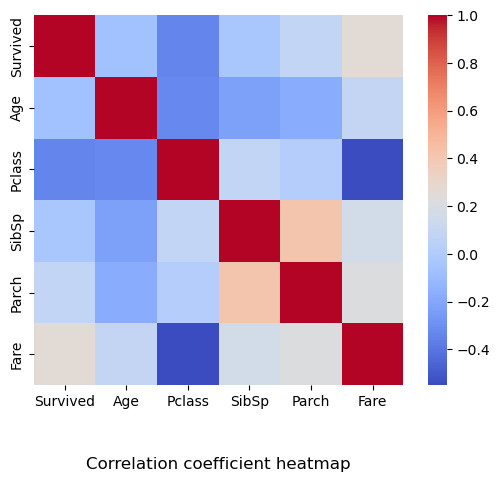

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr_matrix,
           square=True,
           cmap="coolwarm",
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values)
plt.title("Correlation coefficient heatmap", y=-0.25)
# plt.savefig("Correlation coefficient　heatmap")

Correlation Survived

In [15]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

In [16]:
corr_y = pd.DataFrame({"features":["Survived","Age","Pclass","SibSp","Parch","Fare"],"corr_y":corr_matrix["Survived"]},index=None)
# corr_y = pd.DataFrame({"features":["Survived","Age","Pclass","SibSp","Parch","Fare",'Sex',"Embarked"],"corr_y":corr_matrix["Survived"]},index=None)
corr_y = corr_y.reset_index(drop=True)
# corr_y.to_csv("Correlation Survived.csv")
corr_y

,features,corr_y
0,Survived,1.000000
1,Age,-0.069809
2,Pclass,-0.338481
3,SibSp,-0.035322
4,Parch,0.081629
5,Fare,0.257307


**Partial correlation matrix**

In [17]:
# !pip install pingouin

In [18]:
import pingouin
pcorr_matrix = data1.pcorr().round(3)
# pcorr_matrix.to_csv("Partial correlation matrix.csv")
pcorr_matrix

,Survived,Age,Pclass,SibSp,Parch,Fare
Survived,1.000,-0.200,-0.289,-0.094,0.072,0.069
Age,-0.200,1.000,-0.333,-0.165,-0.078,-0.031
Pclass,-0.289,-0.333,1.000,0.071,0.082,-0.519
SibSp,-0.094,-0.165,0.071,1.000,0.357,0.150
Parch,0.072,-0.078,0.082,0.357,1.000,0.180
Fare,0.069,-0.031,-0.519,0.150,0.180,1.000


Partial correlation heatmap

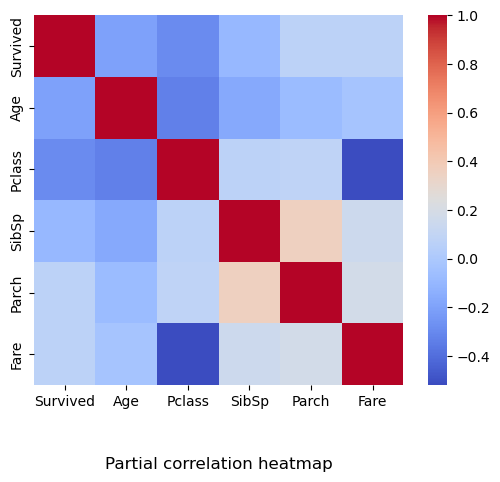

In [19]:
sns.heatmap(pcorr_matrix,
           square=True,
           cmap="coolwarm",
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values)
plt.title("Partial correlation heatmap", y=-0.25)
plt.savefig("Partial correlation heatmap")

Partial correlation Survived

In [20]:
pcorr_y = pd.DataFrame({"features":["Survived","Age","Pclass","SibSp","Parch","Fare"],"pcorr_y":pcorr_matrix["Survived"]},index=None)
pcorr_y = pcorr_y.reset_index(drop=True)
# pcorr_y.to_csv("Partial correlation Survived.csv")
pcorr_y

,features,pcorr_y
0,Survived,1.000
1,Age,-0.200
2,Pclass,-0.289
3,SibSp,-0.094
4,Parch,0.072
5,Fare,0.069


**continuous → discrete**

In [21]:
data1["Age"] = pd.cut(data1["Age"],3)
data1["Fare"] =pd.cut(data1["Fare"],3)

In [22]:
data1.head()

,Survived,Age,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,"(0.34, 26.947]",3,0,1,0,"(-0.512, 170.776]",0
1,1,"(26.947, 53.473]",1,1,1,0,"(-0.512, 170.776]",1
2,1,"(0.34, 26.947]",3,1,0,0,"(-0.512, 170.776]",0
3,1,"(26.947, 53.473]",1,1,1,0,"(-0.512, 170.776]",0
4,0,"(26.947, 53.473]",3,0,0,0,"(-0.512, 170.776]",0


**Bayesian network construction**

In [23]:
# !pip install graphviz
# !pip install pgmpy==0.1.11

In [24]:
data1

,Survived,Age,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,"(0.34, 26.947]",3,0,1,0,"(-0.512, 170.776]",0
1,1,"(26.947, 53.473]",1,1,1,0,"(-0.512, 170.776]",1
2,1,"(0.34, 26.947]",3,1,0,0,"(-0.512, 170.776]",0
3,1,"(26.947, 53.473]",1,1,1,0,"(-0.512, 170.776]",0
4,0,"(26.947, 53.473]",3,0,0,0,"(-0.512, 170.776]",0
...,...,...,...,...,...,...,...,...
886,0,"(26.947, 53.473]",2,0,0,0,"(-0.512, 170.776]",0
887,1,"(0.34, 26.947]",1,1,0,0,"(-0.512, 170.776]",0
888,0,"(26.947, 53.473]",3,1,1,2,"(-0.512, 170.776]",0
889,1,"(0.34, 26.947]",1,0,0,0,"(-0.512, 170.776]",1


In [25]:
# requires pandas==1.5

In [26]:
import pgmpy
from pgmpy.estimators import ConstraintBasedEstimator


est = ConstraintBasedEstimator(data1)

# skel,seperating_sets = est.estimate_skeleton(significance_level = 0.01)
skel,seperating_sets = est.estimate_skeleton()
print("Undirected edges: ",skel.edges())

pdag = est.skeleton_to_pdag(skel,seperating_sets)
print("PDAG edges:       ", pdag.edges())

model = est.pdag_to_dag(pdag)
print("DAG edges:        ", model.edges())

Undirected edges:  [('Survived', 'Pclass'), ('Survived', 'Sex'), ('Age', 'Pclass'), ('Pclass', 'Embarked'), ('Sex', 'Parch'), ('SibSp', 'Parch')]
PDAG edges:        [('Age', 'Pclass'), ('SibSp', 'Parch'), ('Parch', 'Sex'), ('Parch', 'SibSp'), ('Embarked', 'Pclass')]
DAG edges:         [('Age', 'Pclass'), ('Parch', 'Sex'), ('Parch', 'SibSp'), ('Embarked', 'Pclass')]


**Visualization**

In [27]:
# !pip install Pillow

In [28]:
import networkx as nx
from IPython.display import SVG, display
from PIL import Image

1. Undirected graph

In [29]:
# !pip install pygraphviz

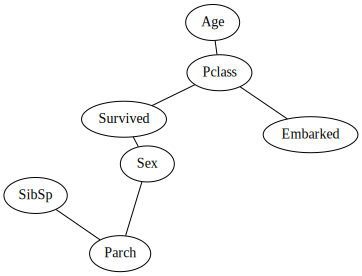

In [30]:
G1 = nx.Graph()
G1.add_nodes_from(["Survived","Age","Pclass","Sex","SibSp","Parch","Fare","Embarked"])
G1.add_edges_from(skel.edges())
G1.remove_node("Fare")

svg1 = SVG(nx.nx_agraph.to_agraph(G1).draw(prog='fdp', format='svg')) #To display needs pygraphviz!
display(svg1)
# G1img = Image.open("/kaggle/input/titanicbayesian-network/Undirected graph.png")
# G1img

2. Partial directed graph

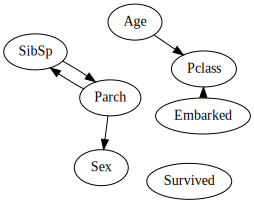

In [31]:
G2 = nx.DiGraph()
G2.add_nodes_from(["Survived","Age","Pclass","Sex","SibSp","Parch","Fare","Embarked"])
G2.add_edges_from(pdag.edges())
G2.remove_node("Fare")

svg2 = SVG(nx.nx_agraph.to_agraph(G2).draw(prog='fdp', format='svg'))
display(svg2)
# G2img = Image.open("/kaggle/input/titanicbayesian-network/Partial directed graph.png")
# G2img

3. Directed graph

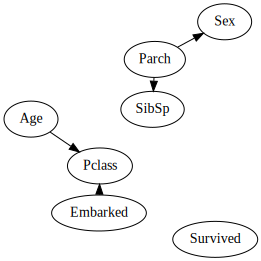

In [32]:
G3 = nx.DiGraph()
G3.add_nodes_from(["Survived","Age","Pclass","Sex","SibSp","Parch","Fare","Embarked"])
G3.add_edges_from(model.edges())
G3.remove_node("Fare")

svg3 = SVG(nx.nx_agraph.to_agraph(G3).draw(prog='fdp', format='svg'))
display(svg3)
# G3img = Image.open("/kaggle/input/titanicbayesian-network/Directed graph.png")
# G3img

4. Final graph

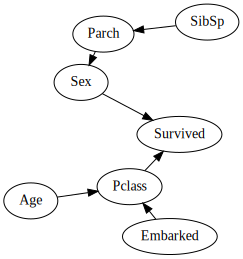

In [33]:
G4 = nx.DiGraph()
G4.add_nodes_from(["Survived","Age","Pclass","Sex","SibSp","Parch","Fare","Embarked"])
G4.add_edges_from(model.edges())
G4.add_edges_from([("Sex","Survived"),("Pclass","Survived"),("SibSp","Parch")])
G4.remove_edge("Parch","SibSp")
G4.remove_node("Fare")

svg4 = SVG(nx.nx_agraph.to_agraph(G4).draw(prog='fdp', format='svg'))
display(svg4)
# G4img = Image.open("/kaggle/input/titanicbayesian-network/Final graph.png")
# G4img

In [34]:
nodes = G4.nodes
edges = G4.edges
print(nodes,edges)

['Survived', 'Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] [('Age', 'Pclass'), ('Pclass', 'Survived'), ('Sex', 'Survived'), ('SibSp', 'Parch'), ('Parch', 'Sex'), ('Embarked', 'Pclass')]


In [42]:
# save as gml

nx.write_gml(G4,"titanic.gml")

**BIC calculation**

In [35]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import BicScore
model = BayesianModel(edges)  
print("BIC="+str(BicScore(data1).score(model)))

BIC=-4829.55707321401


In [36]:
model

**cpds calculation**

In [37]:
# Add CPD (Conditional Probability Distribution) to the Bayesian Model.


In [38]:
model.fit(data1)
cpds = model.get_cpds()
for cpd in cpds:
    print(cpd, '\n')

+-----------------------+-----------+
| Age((0.34, 26.947])   | 0.35883   |
+-----------------------+-----------+
| Age((26.947, 53.473]) | 0.586052  |
+-----------------------+-----------+
| Age((53.473, 80.0])   | 0.0551181 |
+-----------------------+-----------+ 

+-------------+-----------+
| Embarked(0) | 0.724409  |
+-------------+-----------+
| Embarked(1) | 0.188976  |
+-------------+-----------+
| Embarked(2) | 0.0866142 |
+-------------+-----------+ 

+----------+-----------------------+----------------------+---------------------+----------+----------+----------+----------+
| SibSp    | SibSp(0)              | SibSp(1)             | SibSp(2)            | SibSp(3) | SibSp(4) | SibSp(5) | SibSp(8) |
+----------+-----------------------+----------------------+---------------------+----------+----------+----------+----------+
| Parch(0) | 0.8828382838283828    | 0.5885167464114832   | 0.5714285714285714  | 0.125    | 0.0      | 0.0      | 0.0      |
+----------+------------------

In [39]:
cpds

[<TabularCPD representing P(Age:3) at 0x7fc17aa82fd0>,
 <TabularCPD representing P(Embarked:3) at 0x7fc1a2188220>,
 <TabularCPD representing P(Parch:7 | SibSp:7) at 0x7fc17aa8bb20>,
 <TabularCPD representing P(Pclass:3 | Age:3, Embarked:3) at 0x7fc17aa8bbb0>,
 <TabularCPD representing P(Sex:2 | Parch:7) at 0x7fc1b0e5fca0>,
 <TabularCPD representing P(SibSp:7) at 0x7fc1b0e5f070>,
 <TabularCPD representing P(Survived:2 | Pclass:3, Sex:2) at 0x7fc1b0e5f2e0>]

In [40]:
print(cpds[0])

+-----------------------+-----------+
| Age((0.34, 26.947])   | 0.35883   |
+-----------------------+-----------+
| Age((26.947, 53.473]) | 0.586052  |
+-----------------------+-----------+
| Age((53.473, 80.0])   | 0.0551181 |
+-----------------------+-----------+


In [41]:
print(cpds[2])

+----------+-----------------------+----------------------+---------------------+----------+----------+----------+----------+
| SibSp    | SibSp(0)              | SibSp(1)             | SibSp(2)            | SibSp(3) | SibSp(4) | SibSp(5) | SibSp(8) |
+----------+-----------------------+----------------------+---------------------+----------+----------+----------+----------+
| Parch(0) | 0.8828382838283828    | 0.5885167464114832   | 0.5714285714285714  | 0.125    | 0.0      | 0.0      | 0.0      |
+----------+-----------------------+----------------------+---------------------+----------+----------+----------+----------+
| Parch(1) | 0.0627062706270627    | 0.2727272727272727   | 0.25                | 0.4375   | 0.5      | 0.0      | 0.0      |
+----------+-----------------------+----------------------+---------------------+----------+----------+----------+----------+
| Parch(2) | 0.04785478547854786   | 0.09090909090909091  | 0.14285714285714285 | 0.4375   | 0.5      | 1.0      | 1.0